engine_displacement
[170 130 220 210 190 240]
36

horsepower
[159.  97.  78.  nan 140. 127.]
192

vehicle_weight
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999
 2484.88398604]
9704

model_year
[2003 2007 2018 2009 2008 2012]
24

fuel_efficiency_mpg
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912 17.27181837]
9704



engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

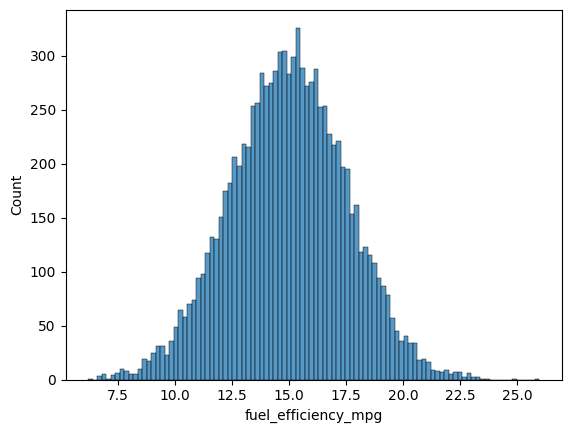

In [34]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('car_fuel_efficiency.csv')


df.columns = df.columns.str.lower().str.replace(' ', '_')

strings = list(df.dtypes[df.dtypes == 'object'].index)


for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')


df = df[['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']]

df.head()
df.dtypes

for col in df.columns:
    print(col)
    print(df[col].unique()[:6])
    print(df[col].nunique())
    print()

%matplotlib inline
sns.histplot(df.fuel_efficiency_mpg, bins=100)

df.isnull().sum()







In [35]:
median_value = df['horsepower'].median()
print(f"The median of 'horsepower' is: {median_value}")

The median of 'horsepower' is: 149.0


In [36]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n

n_val, n_test, n_train

df.iloc[[10, 0, 3, 5]]

df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

idx = np.arange(n)

df_zero = df
df_mean = df

df_zero.horsepower = df.horsepower.fillna(0)
df_mean.horsepower = df.horsepower.fillna(df.iloc[idx[:n_train]].horsepower.mean())


np.random.seed(42)
np.random.shuffle(idx)
df_train_zero = df_zero.iloc[idx[:n_train]]
df_train_mean = df_mean.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
df_train_zero.head()
df_train_mean.head()

len(df_train_zero), len(df_train_mean), len(df_val), len(df_test)

df_train_zero = df_train_zero.reset_index(drop=True)
df_train_mean = df_train_mean.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_zero = np.log1p(df_train_zero.fuel_efficiency_mpg.values)
y_train_mean = np.log1p(df_train_mean.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train_zero['fuel_efficiency_mpg']
del df_train_mean['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

len(y_train_zero), len(y_train_mean)

df_train_zero.iloc[10]

engine_displacement     240.000000
horsepower              159.000000
vehicle_weight         2916.987921
model_year             2001.000000
Name: 10, dtype: float64